In [1]:
from fair_cc_functions import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# generates unfair and corresponding fair graph, computes clusters for these graphs and their costs
# for all amount of nodes from 4 to n with 10 iterations by default
# returns 2 arrays with the means of unfair and fair costs
def stats_complete(unfair_graph, iteration=10):
    stats = []
    nodes = len(unfair_graph.nodes)
    if nodes < 4: return -1
    fairlets = create_fairlets(unfair_graph)
    fair_graph = nx.Graph()
    fair_graph.add_nodes_from(fairlets)
    fair_p, fair_m = create_fairlet_relations(fairlets, unfair_graph)
    fair_graph.add_weighted_edges_from(fair_p)
    fair_graph.add_weighted_edges_from(fair_m)
    for j in range(iteration):
        fair_cluster = cc_pivot(fair_graph)
        costs = cost(fair_cluster, unfair_graph)
        stats.append(costs)
    return stats

def stats_incomplete(unfair_graph, iteration=10):
    stats = []
    nodes = len(unfair_graph.nodes())
    if nodes < 4: return -1
    fairlets = create_fairlets(unfair_graph)
    fair_graph = nx.Graph()
    fair_graph.add_nodes_from(fairlets)
    fair_p, fair_m = create_fairlet_relations_incomplete(fairlets, unfair_graph)
    fair_graph.add_weighted_edges_from(fair_p)
    fair_graph.add_weighted_edges_from(fair_m)
    for j in range(iteration):
        fair_cluster = cc_pivot(fair_graph)
        costs = cost(fair_cluster, unfair_graph)
        stats.append(costs)
    return stats

In [3]:
# stats for scenario 1
# always same costs as already optimal
res0 = []
for i in range(10, 61, 2):
    unfair_graph = generate_complete_graph(i)
    res0.append(stats_complete(unfair_graph, 1))
nodes = [i for i in range(10, 61, 2)]
max_calc_cost = [i*i/4 for i in nodes]

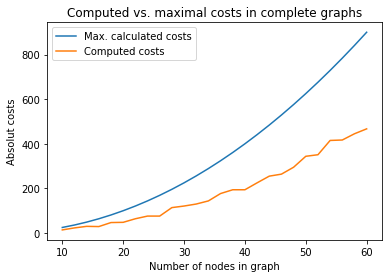

In [4]:
plt.plot(nodes, max_calc_cost, label='Max. calculated costs')
plt.plot(nodes, res0, label='Computed costs')
plt.ylabel('Absolut costs')
plt.xlabel('Number of nodes in graph')
plt.title('Computed vs. maximal costs in complete graphs')
plt.legend()
plt.savefig('../comp_vs_calc_cost_complete_graph.png')
plt.savefig('CompleteGraphsPlots/comp_vs_calc_cost_complete_graph.png')
plt.show()

In [5]:
# similar density of incomplete graphs
# probability for (+), resp. (-), is 0.5 in red and blue subgraphs => expected same density
res1 = []
for i in range(10, 61, 2):
    unfair_graph = generate_incomplete_graph(i)
    stat = stats_incomplete(unfair_graph, iteration=40)
    res1.append(stat)

In [6]:
# red/blue subgraphs are both sparse (regarding (+) relations)
res2 = []
for i in range(10, 61, 2):
    unfair_graph = generate_red_blue_graph(i, 'bal_bin_tree', 'star')
    stat = stats_incomplete(unfair_graph, iteration=40)
    res2.append(stat)

In [7]:
# red/blue subgraphs are both dense (regarding (+) relations)
res3 =[]
for i in range(10, 61, 2):
    unfair_graph  = generate_red_blue_graph(i, 'bipartite', 'bipartite')
    stat = stats_incomplete(unfair_graph, iteration=40)
    res3.append(stat)

In [8]:
# red/blue subgraph are dense/sparse (regarding + relations)
res4 = []
for i in range(10, 61, 2):
    unfair_graph = generate_red_blue_graph(i, 'star', 'bipartite')
    stat = stats_incomplete(unfair_graph, iteration=40)
    res4.append(stat)

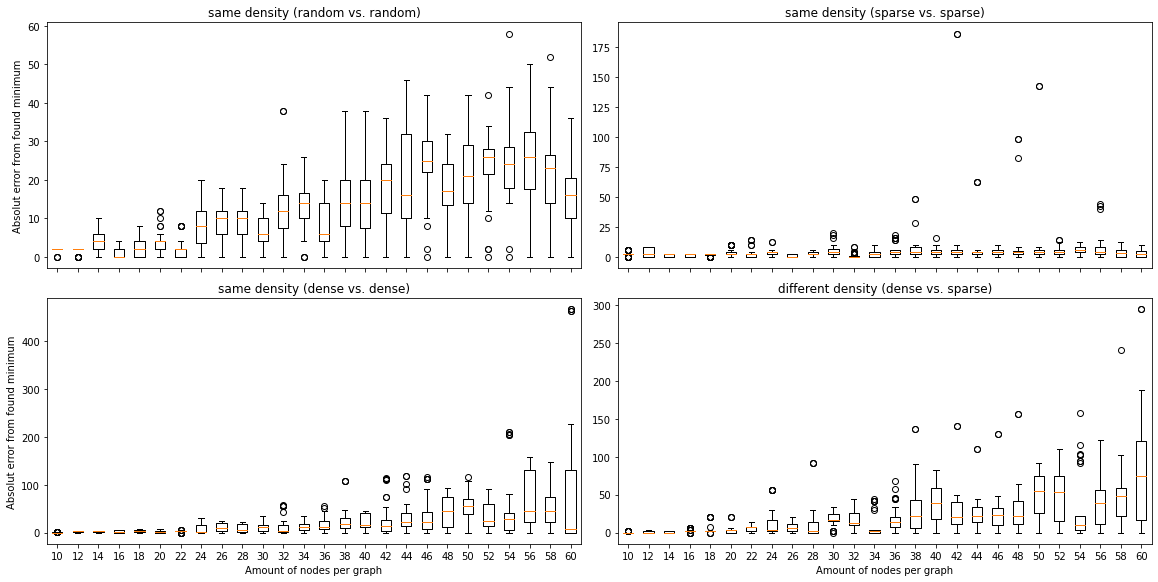

In [61]:
fig, ax = plt.subplots(2, 2, figsize=(16,8), sharex=True)
ax[0][0].boxplot([i-j for i,j in zip(res1, np.min(res1, axis=1))])
ax[0][0].set_title('same density (random vs. random)')
ax[0][1].boxplot([i-j for i,j in zip(res2, np.min(res2, axis=1))])
ax[0][1].set_title('same density (sparse vs. sparse)')
ax[1][0].boxplot([i-j for i,j in zip(res3, np.min(res3, axis=1))])
ax[1][0].set_title('same density (dense vs. dense)')
ax[1][1].boxplot([i-j for i,j in zip(res4, np.min(res4, axis=1))])
ax[1][1].set_title('different density (dense vs. sparse)')
ax[0][0].set_xticks([i for i in range(1, 27)], nodes)
plt.tight_layout()
ax[0][0].set_ylabel('Absolut error from found minimum')
ax[1][0].set_ylabel('Absolut error from found minimum')
ax[1][0].set_xlabel('Amount of nodes per graph')
ax[1][1].set_xlabel('Amount of nodes per graph')
plt.savefig('IncompleteGraphsPlots/boxplot_different_densities.png')
plt.show()